### This script contains the following:

#### 1. Importing libraries and datasets
#### 2. Reducing the dataset and making an Artificial Neural Network (ANN)

### 1. Importing libraries and datasets

In [36]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [37]:
# Defining a path for importing/exporting
path = r'/Users/peterguan/ClimateWins ML'

In [38]:
# Importing the Scaled ClimateWins dataset
climatewins_scaled = pd.read_csv(r'/Users/peterguan/ClimateWins ML/climatewins_scaled.csv', index_col = 0)

In [39]:
# Checking if the dataset imported successfully
climatewins_scaled.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.731975,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.731824,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.731673,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.731523,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.731372,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [40]:
# Checking the dimensions of the dataset
climatewins_scaled.shape

(22950, 171)

In [41]:
# Importing the PLEASANT WEATHER dataset
pleasantweather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [42]:
# Checking if the dataset imported successfully 
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Checking the dimensions of the dataset
pleasantweather.shape

(22950, 16)

### 2. Reducing the dataset and making an Artificial Neural Network (ANN)

In [45]:
# Dropping unneeded columns
climatewins_scaled_reduced = climatewins_scaled.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'])

In [46]:
# Checking if the columns were dropped successfully 
climatewins_scaled_reduced.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.731975,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.731824,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.731673,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.731523,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.731372,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [47]:
# Checking the dimensions of the dataset
climatewins_scaled_reduced.shape

(22950, 150)

In [48]:
# Creating an 'X' matrix by dropping the DATE and MONTH columns
X = climatewins_scaled_reduced.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [49]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-0.4920956  -1.41107749 -0.03095027 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.36049213  1.08186228 -0.58789342 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 1.02803443  0.66637232 -0.866365   ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [-1.01183429  1.08186228 -0.03095027 ... -0.07385364  0.48369809
  -0.61161358]
 [-0.05505633  0.66637232 -0.03095027 ...  0.55557144  0.42909216
   0.64929458]
 [ 1.4970669  -1.41107749 -1.14483657 ... -0.0139084  -0.0077553
  -0.00981651]]


/var/folders/j8/l8hsy2p15dj9phf2ztxh0b040000gn/T/ipykernel_58400/4131692195.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend().set_visible(False)
/var/folders/j8/l8hsy2p15dj9phf2ztxh0b040000gn/T/ipykernel_58400/4131692195.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend().set_visible(False)


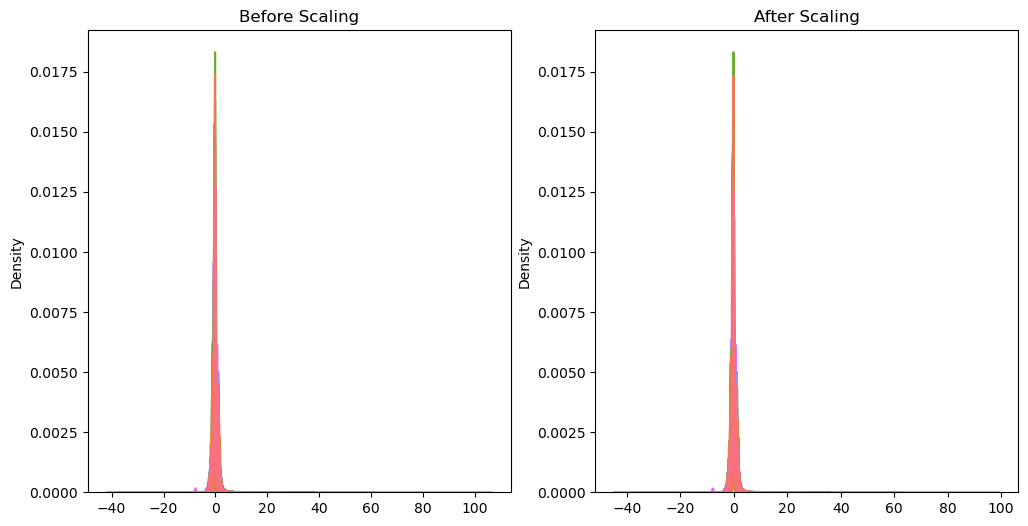

In [81]:
# Showing the scaling differences ##turn off legend
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)
ax1.legend().set_visible(False)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)
ax2.legend().set_visible(False)

plt.show()

In [89]:
# Test Number 1
mlp_1 = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)

# Fitting the data to the model 
mlp_1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [91]:
# Test Number 2
mlp_2 = MLPClassifier(hidden_layer_sizes=(10, 5, 8), max_iter=800, tol=0.00001)

#Fit the data to the model 
mlp_2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5, 8), max_iter=800, tol=1e-05)

In [93]:
# Test Number 3
mlp_3 = MLPClassifier(hidden_layer_sizes=(38, 18, 28), max_iter=2800, tol=0.00000000001)
#Fit the data to the model
mlp_3.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(38, 18, 28), max_iter=2800, tol=1e-11)

In [105]:
# Testing the ANN accuracy for Test Number 1
y_pred = mlp_1.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test_1 = mlp_1.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.482686497792238
0.6875217845939352


In [107]:
# Testing the ANN accuracy for Test Number 2
y_pred = mlp_2.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test_2 = mlp_2.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5266674413200093
0.6875217845939352


In [109]:
# Testing the ANN accuracy for Test Number 3
y_pred = mlp_3.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test_3 = mlp_3.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.7746339762956077
0.6875217845939352


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


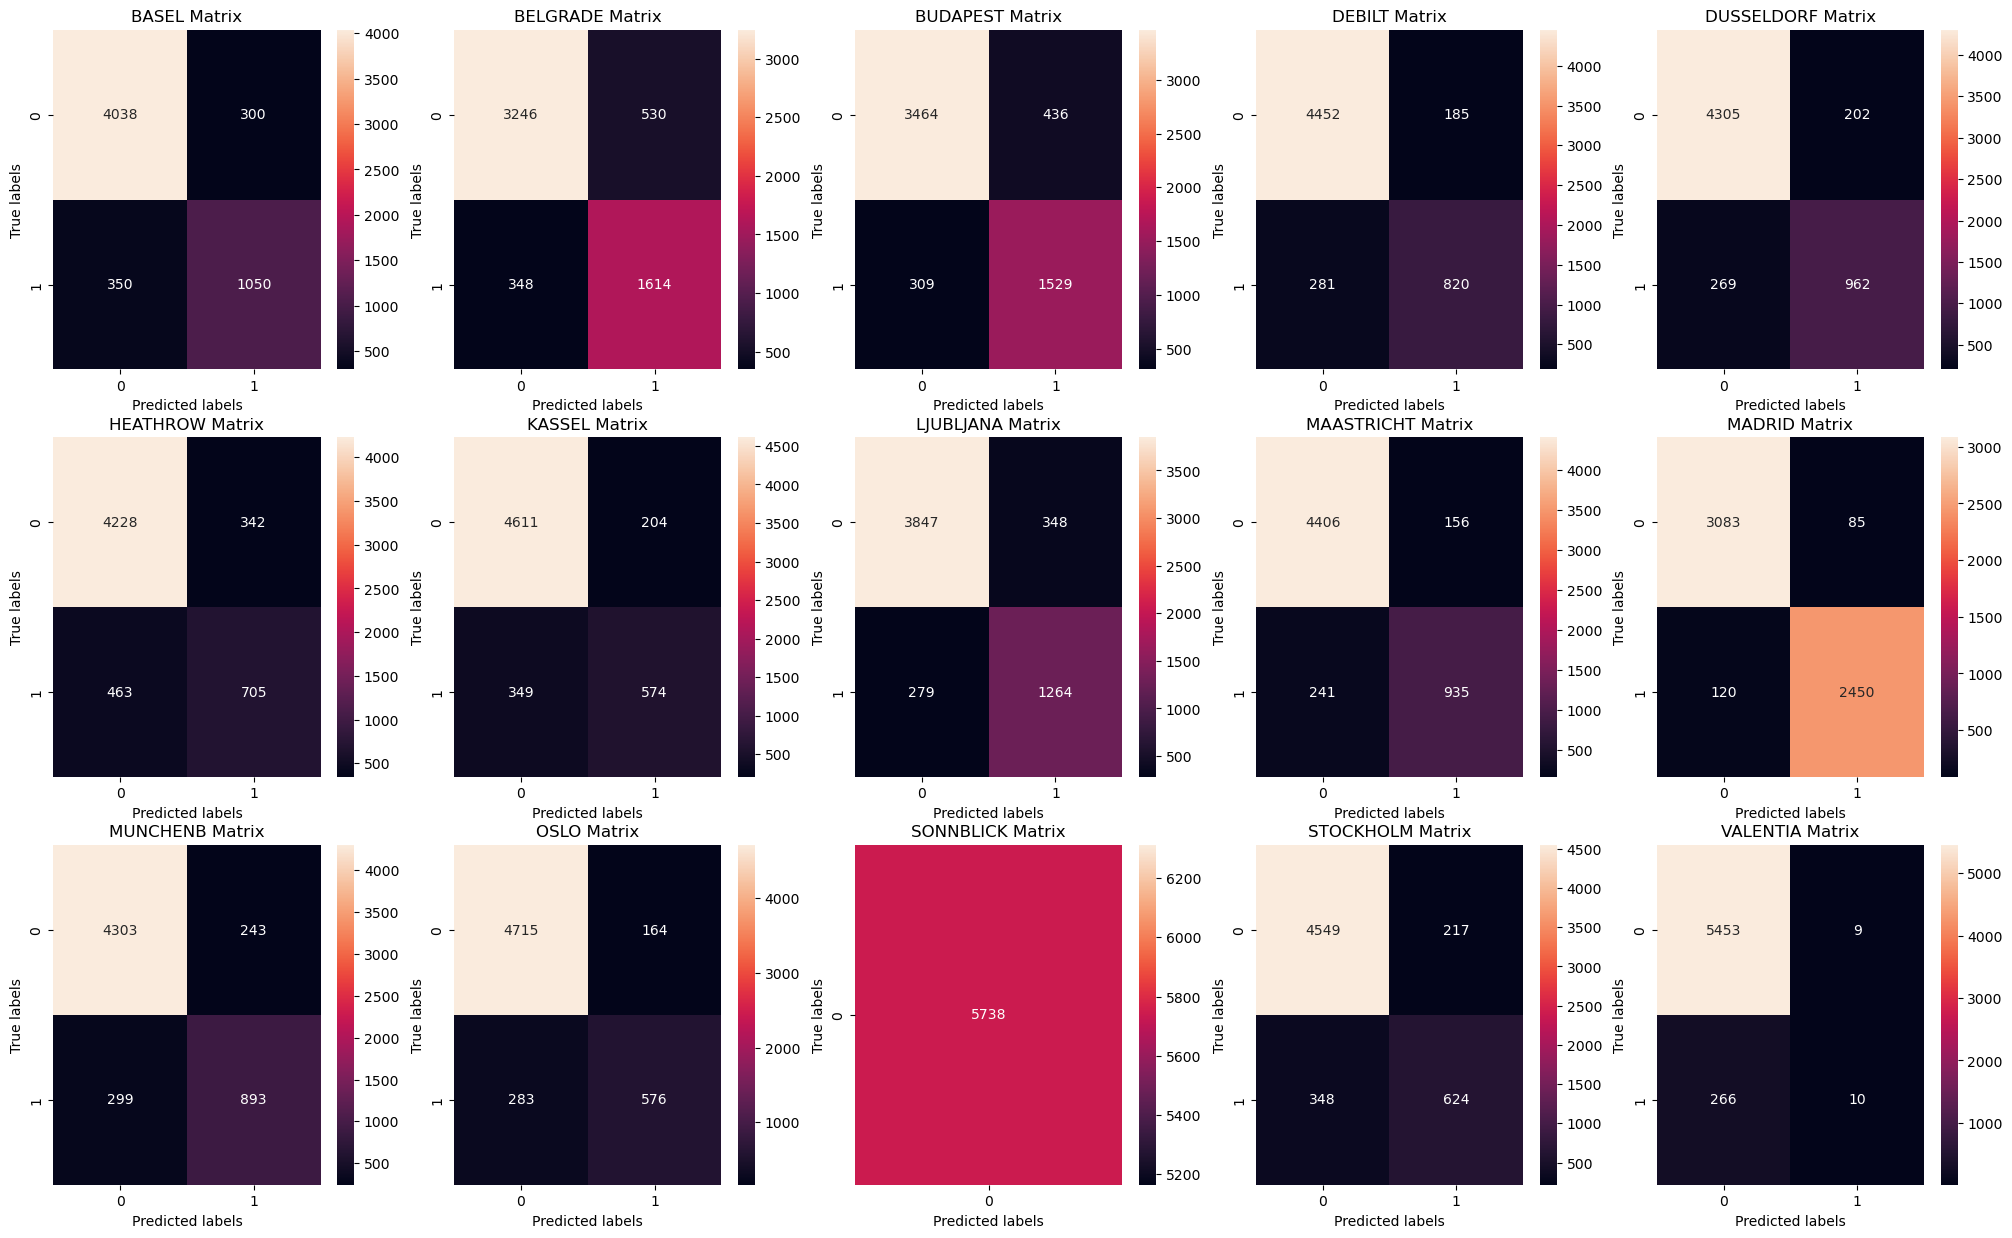

In [113]:
# Creating the confusion matrix for Test Number 1 (15 matrices)
locations = list({x.split("_")[0] for x in climatewins_scaled_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test_1[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


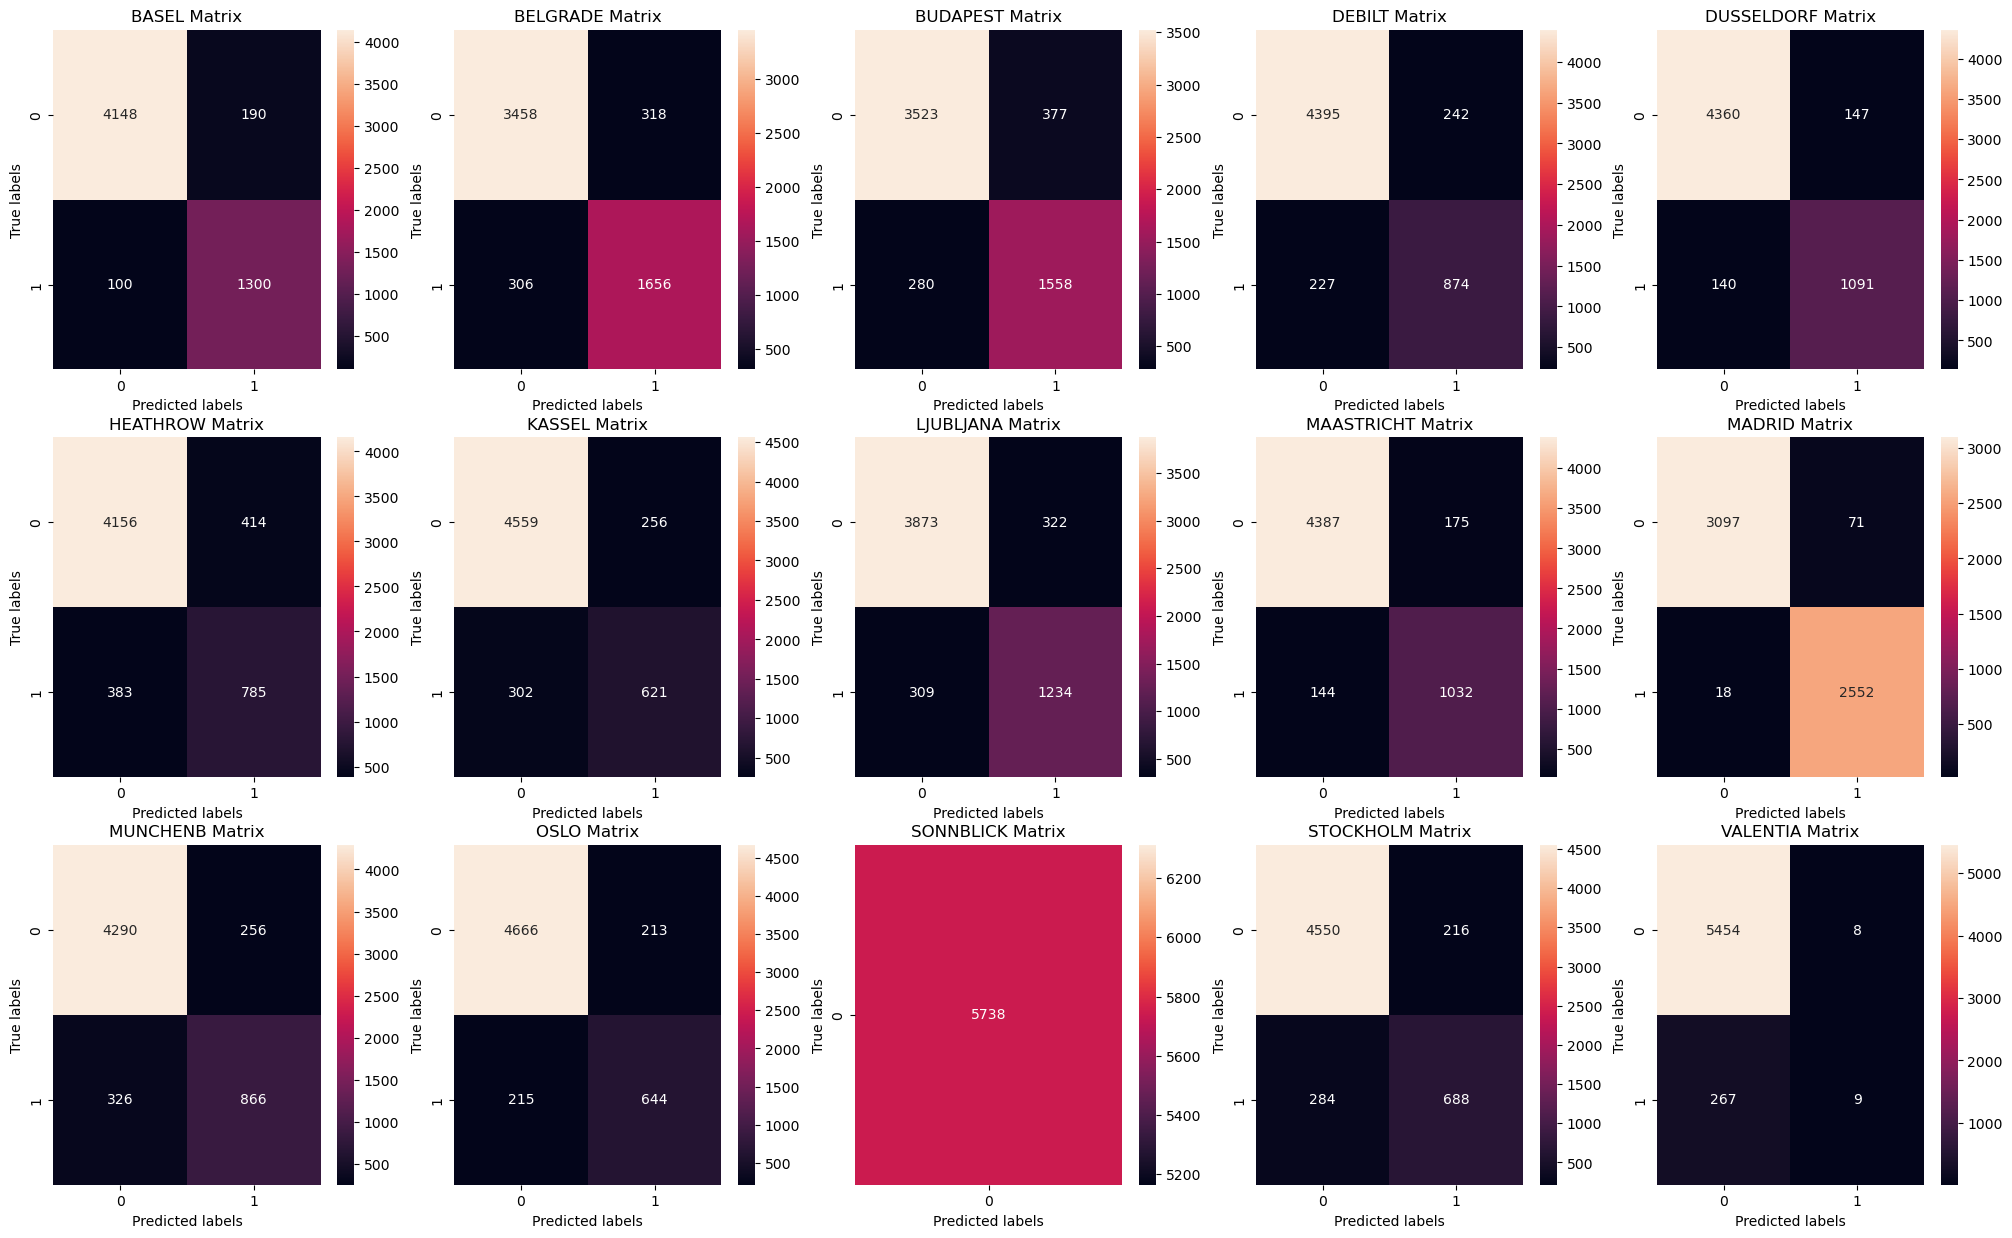

In [115]:
# Creating the confusion matrix for Test Number 2 (15 matrices)
locations = list({x.split("_")[0] for x in climatewins_scaled_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test_2[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


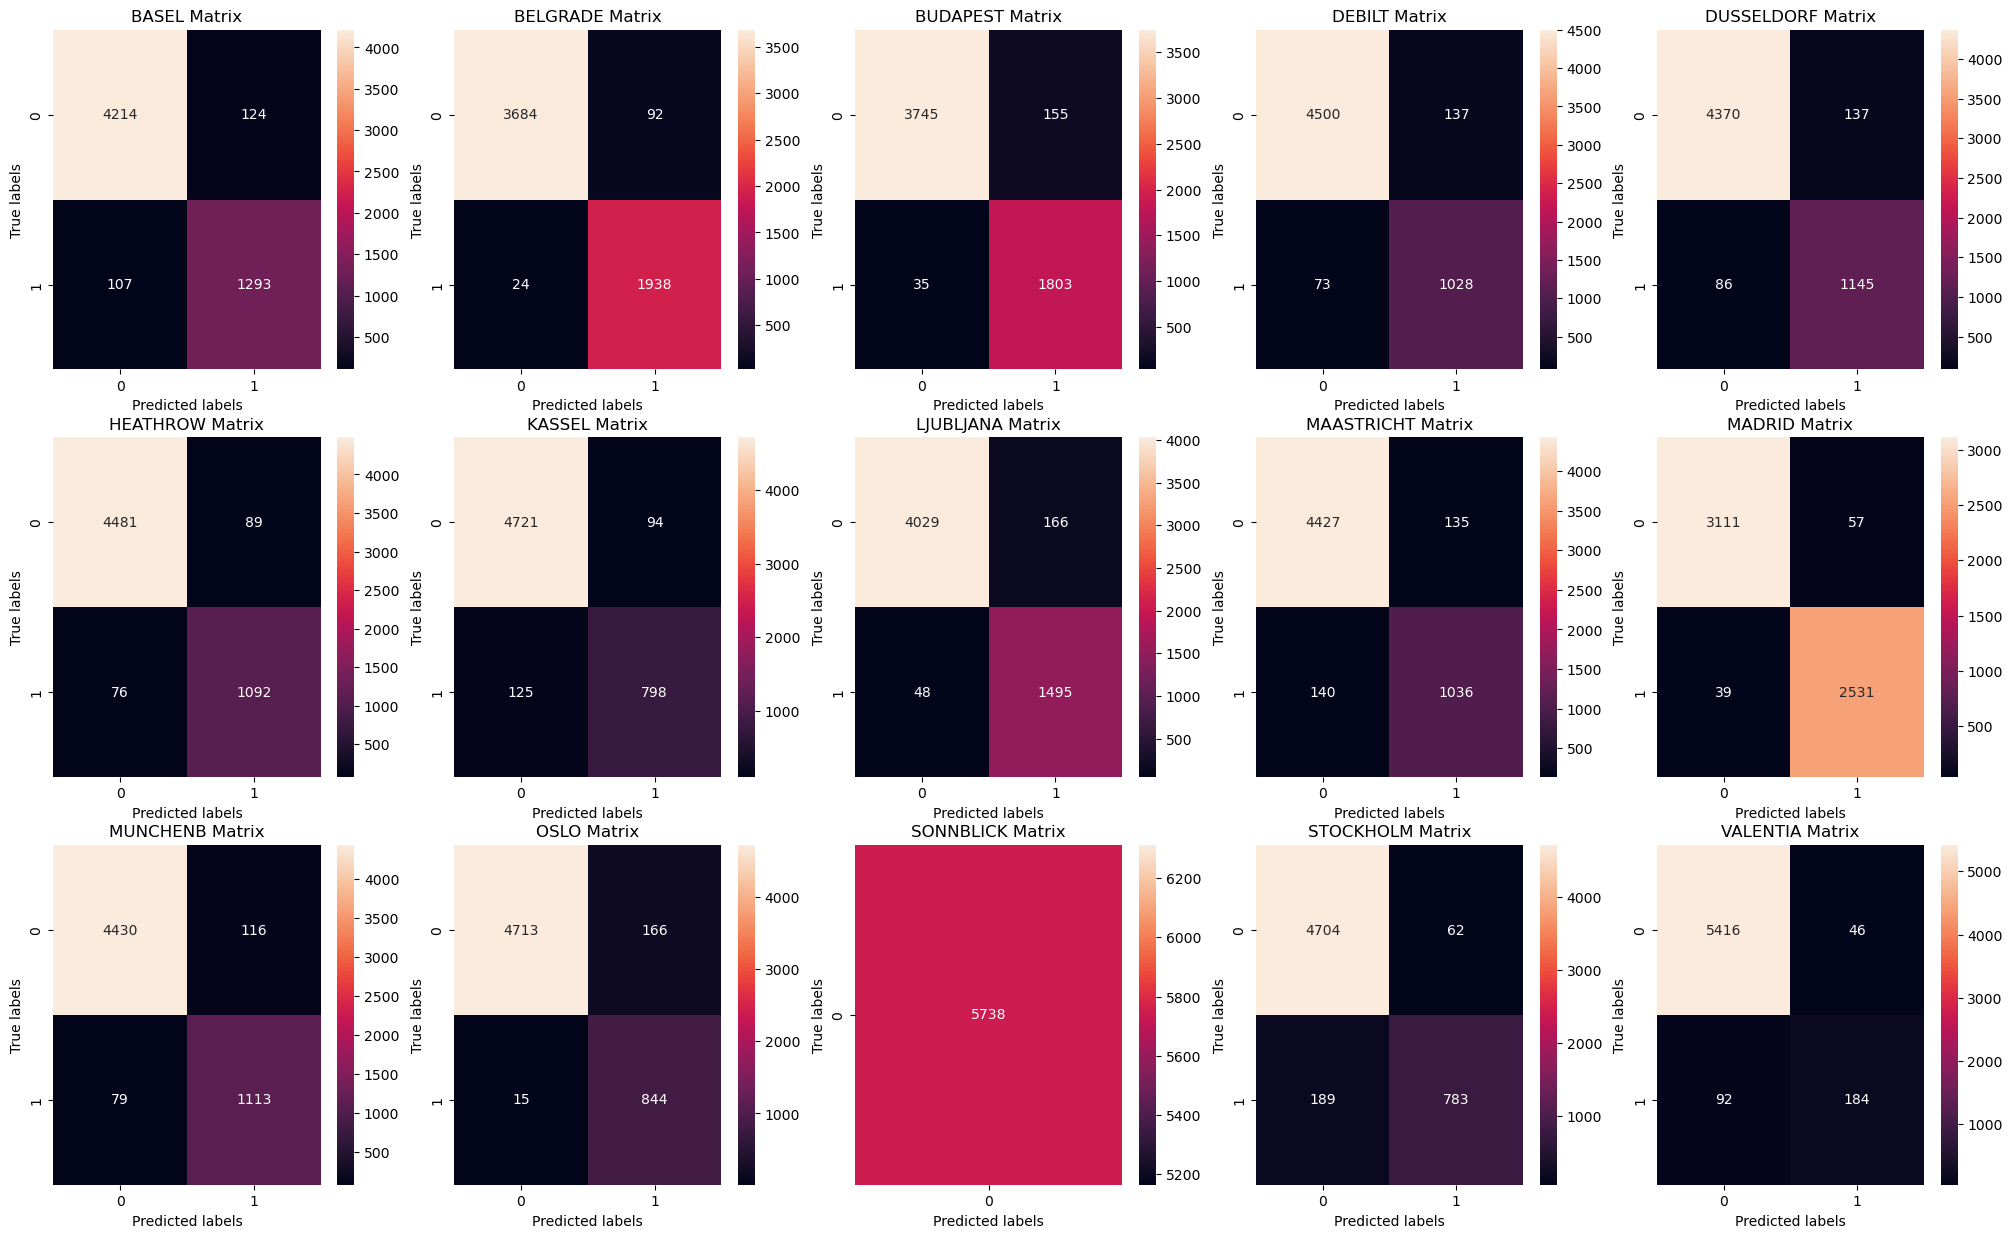

In [117]:
# Creating the confusion matrix for Test Number 3 (15 matrices)
locations = list({x.split("_")[0] for x in climatewins_scaled_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test_3[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1